# Hacker News Posts Analysis

In this project, we'll work with a data set of submissions to popular technology site Hacker News.

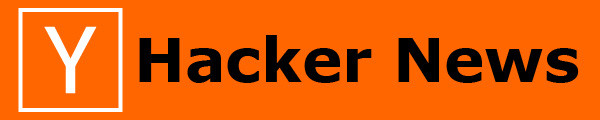

Hacker News is a site started by the startup incubator [Y Combinator](https://www.ycombinator.com/about/), where user-submitted stories (known as "posts") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result.

You can find the data set [here](https://www.kaggle.com/hacker-news/hacker-news-posts), but note that it has been reduced from almost 300,000 rows to approximately 20,000 rows by removing all submissions that did not receive any comments, and then randomly sampling from the remaining submissions. Below are descriptions of the columns:

<u>Data Dictionary</u>

- <b>id:</b> The unique identifier from Hacker News for the post
- <b>title:</b> The title of the post
- <b>url:</b> The URL that the posts links to, if it the post has a URL
- <b>num_points:</b> The number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
- <b>num_comments:</b> The number of comments that were made on the post
- <b>author:</b> The username of the person who submitted the post
- <b>created_at:</b> The date and time at which the post was submitted

We're specifically interested in posts whose titles begin with either Ask HN or Show HN. Users submit Ask HN posts to ask the Hacker News community a specific question. Likewise, users submit Show HN posts to show the Hacker News community a project, product, or just generally something interesting.

We'll compare these two types of posts to determine the following:

- Do Ask HN or Show HN receive more comments on average?
- Do posts created at a certain time receive more comments on average?


In [1]:
open_file = open("/Users/tanner/Desktop/Hacker News Data Set.csv")
from csv import reader
read_file = reader(open_file)
hn = list(read_file)
print(hn[:5])# prints first five rows of dataset

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26'], ['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24'], ['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19'], ['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16']]


In [2]:
headers = hn[0]
hn = hn[1:]
print(headers) # prints column headers

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


In [3]:
print(hn[:5])# prints first five rows of hn without hearder row/column headers

[['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26'], ['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24'], ['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19'], ['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16'], ['12578979', 'How the Data Vault Enables the Next-Gen Data Warehouse and Data Lake', 'https://www.talend.com/blog/2016/05/12/talend-and-Â\x93the-data-vaultÂ\x94', '1', '0', 'markgainor1', '9/26/2016 3:14']]


In [4]:
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1]
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)

print("ask_posts:",len(ask_posts))
print("show_posts:",len(show_posts))
print("other_posts",len(other_posts))

ask_posts: 9139
show_posts: 10158
other_posts 273822


In [5]:
total_ask_comments = 0

for row in ask_posts:
    comments = int(row[4])
    total_ask_comments += comments

avg_ask_comments = total_ask_comments / len(ask_posts)
print(avg_ask_comments)

10.393478498741656


In [6]:
total_show_comments = 0

for row in show_posts:
    comments = int(row[4])
    total_show_comments += comments

avg_show_comments = total_show_comments / len(show_posts)
print(avg_show_comments)

4.886099625910612


### Calculation
On average a single user leaves 10 comments on a single Ask HN post, while on average a single user leaves 5 comments on a single Show HN posts. Thus Ask HN posts receive more user engagement than Show HN posts.

In [11]:
import datetime as dt

In [12]:
result_list = []
for row in ask_posts:
    result_list.append([row[6],int(row[4])])

counts_by_hour = {} # number of posts by hour
comments_by_hour ={} # number of comments by hour

for row in result_list:
    date = row[0]
    dt_object = dt.datetime.strptime(date,"%m/%d/%Y %H:%M")
    '''
    Alternative to selecting the hour
    hour = int(str(row[0][8:10]).replace(" ",""))
    '''
    hour = dt_object.strftime("%H")
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = row[1]
    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += row[1]
print("Comments by hour:\n",comments_by_hour)
print("\n")
print("Posts by hour:\n",counts_by_hour)

Comments by hour:
 {'02': 2996, '01': 2089, '22': 3372, '21': 4500, '19': 3954, '17': 5547, '15': 18525, '14': 4972, '13': 7245, '11': 2797, '10': 3013, '09': 1477, '07': 1585, '03': 2154, '23': 2297, '20': 4462, '16': 4466, '08': 2362, '00': 2277, '18': 4877, '12': 4234, '04': 2360, '06': 1587, '05': 1838}


Posts by hour:
 {'02': 269, '01': 282, '22': 383, '21': 518, '19': 552, '17': 587, '15': 646, '14': 513, '13': 444, '11': 312, '10': 282, '09': 222, '07': 226, '03': 271, '23': 343, '20': 510, '16': 579, '08': 257, '00': 301, '18': 614, '12': 342, '04': 243, '06': 234, '05': 209}


In [64]:
avg_by_hour =[]
for hour in comments_by_hour:
    avg_by_hour.append([hour,(comments_by_hour[hour])/(counts_by_hour[hour])])
avg_by_hour

[['02', 11.137546468401487],
 ['01', 7.407801418439717],
 ['22', 8.804177545691905],
 ['21', 8.687258687258687],
 ['19', 7.163043478260869],
 ['17', 9.449744463373083],
 ['15', 28.676470588235293],
 ['14', 9.692007797270955],
 ['13', 16.31756756756757],
 ['11', 8.96474358974359],
 ['10', 10.684397163120567],
 ['09', 6.653153153153153],
 ['07', 7.013274336283186],
 ['03', 7.948339483394834],
 ['23', 6.696793002915452],
 ['20', 8.749019607843136],
 ['16', 7.713298791018998],
 ['08', 9.190661478599221],
 ['00', 7.5647840531561465],
 ['18', 7.94299674267101],
 ['12', 12.380116959064328],
 ['04', 9.7119341563786],
 ['06', 6.782051282051282],
 ['05', 8.794258373205741]]

In [14]:
swap_avg_by_hour = []
for hr in avg_by_hour:
    swap_avg_by_hour.append([hr[1],hr[0]])
print(swap_avg_by_hour)

[[11.137546468401487, '02'], [7.407801418439717, '01'], [8.804177545691905, '22'], [8.687258687258687, '21'], [7.163043478260869, '19'], [9.449744463373083, '17'], [28.676470588235293, '15'], [9.692007797270955, '14'], [16.31756756756757, '13'], [8.96474358974359, '11'], [10.684397163120567, '10'], [6.653153153153153, '09'], [7.013274336283186, '07'], [7.948339483394834, '03'], [6.696793002915452, '23'], [8.749019607843136, '20'], [7.713298791018998, '16'], [9.190661478599221, '08'], [7.5647840531561465, '00'], [7.94299674267101, '18'], [12.380116959064328, '12'], [9.7119341563786, '04'], [6.782051282051282, '06'], [8.794258373205741, '05']]


In [58]:
sorted_swap = sorted(swap_avg_by_hour,reverse=True)

In [57]:
print("Top 5 Hours for Ask Posts Comments")
print("\n")

for avg_hr in sorted_swap[:5]:
    dt_object = dt.datetime.strptime(avg_hr[1],"%H")
    time_stamp = dt_object.strftime("%H:%M")
    average = avg_hr[0]
    string = "{}: {:.2f} average comments per post".format(time_stamp,average)
    
    print(string)

Top 5 Hours for Ask Posts Comments


15:00: 28.68 average comments per post
13:00: 16.32 average comments per post
12:00: 12.38 average comments per post
02:00: 11.14 average comments per post
10:00: 10.68 average comments per post


# Conclusion

The most optimal time to create a post is 3:00o.m. EST.